# Pandas Visualizing

In [1]:
!pip install -U finance-datareader


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import FinanceDataReader as fdr
import pandas as pd

df = fdr.DataReader('272210', '2018')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-11-13,10371,10818,9611,9925,15462185,NaN
2019-11-14,9969,10505,9656,10416,3649312,0.049471
2019-11-15,10684,11176,10371,10908,5304317,0.047235
2019-11-18,10908,11221,10729,10908,2652187,0.000000
2019-11-19,10997,11042,10416,10640,1411800,-0.024569


<AxesSubplot: xlabel='Date'>

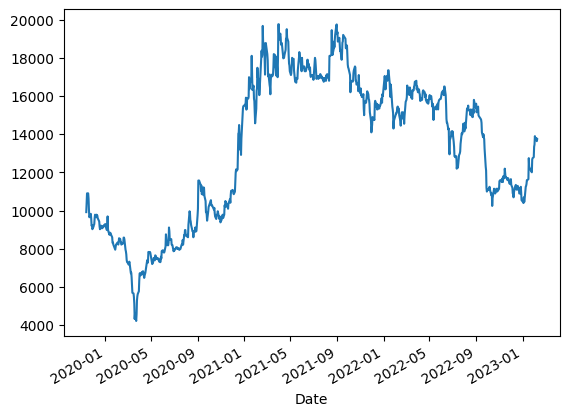

In [3]:
df['Close'].plot() # 시리즈.plot()하면 index가 x축으로, 값이 y축으로 자동으로 들어가서 그려짐 //// 시리즈에서만 plot해도 그래프 그려짐!

<AxesSubplot: xlabel='Date'>

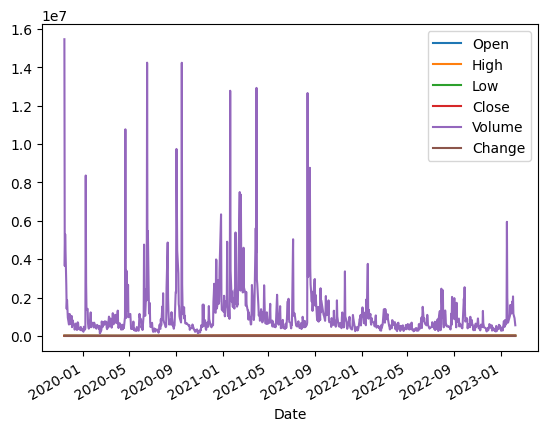

In [4]:
df.plot() # volume이 너무 커서 좀 흉함

<AxesSubplot: xlabel='Date'>

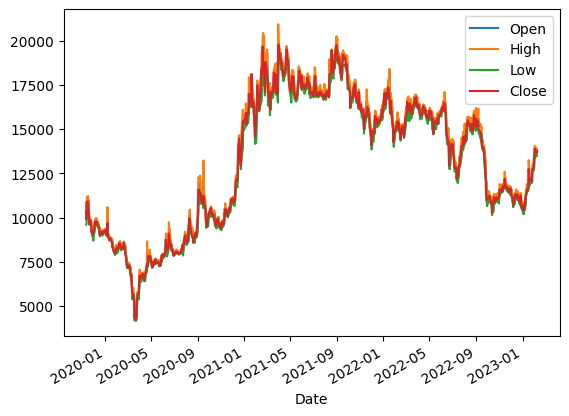

In [5]:
df.drop(['Volume', 'Change'], axis = 1).plot() # volume하고 change 빼고 plot해줘

In [ ]:
# colab에서 한글 폰트 쓰려면
# 아래 설치하고 런타임 다시 시작!(한글 폰트 아예 설치해야 됨 코랩에!)

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [19]:
# jupyter에서 한글 폰트 설정 > (운영체제에)기존에 설치된걸 사용

# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline

# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Close')]

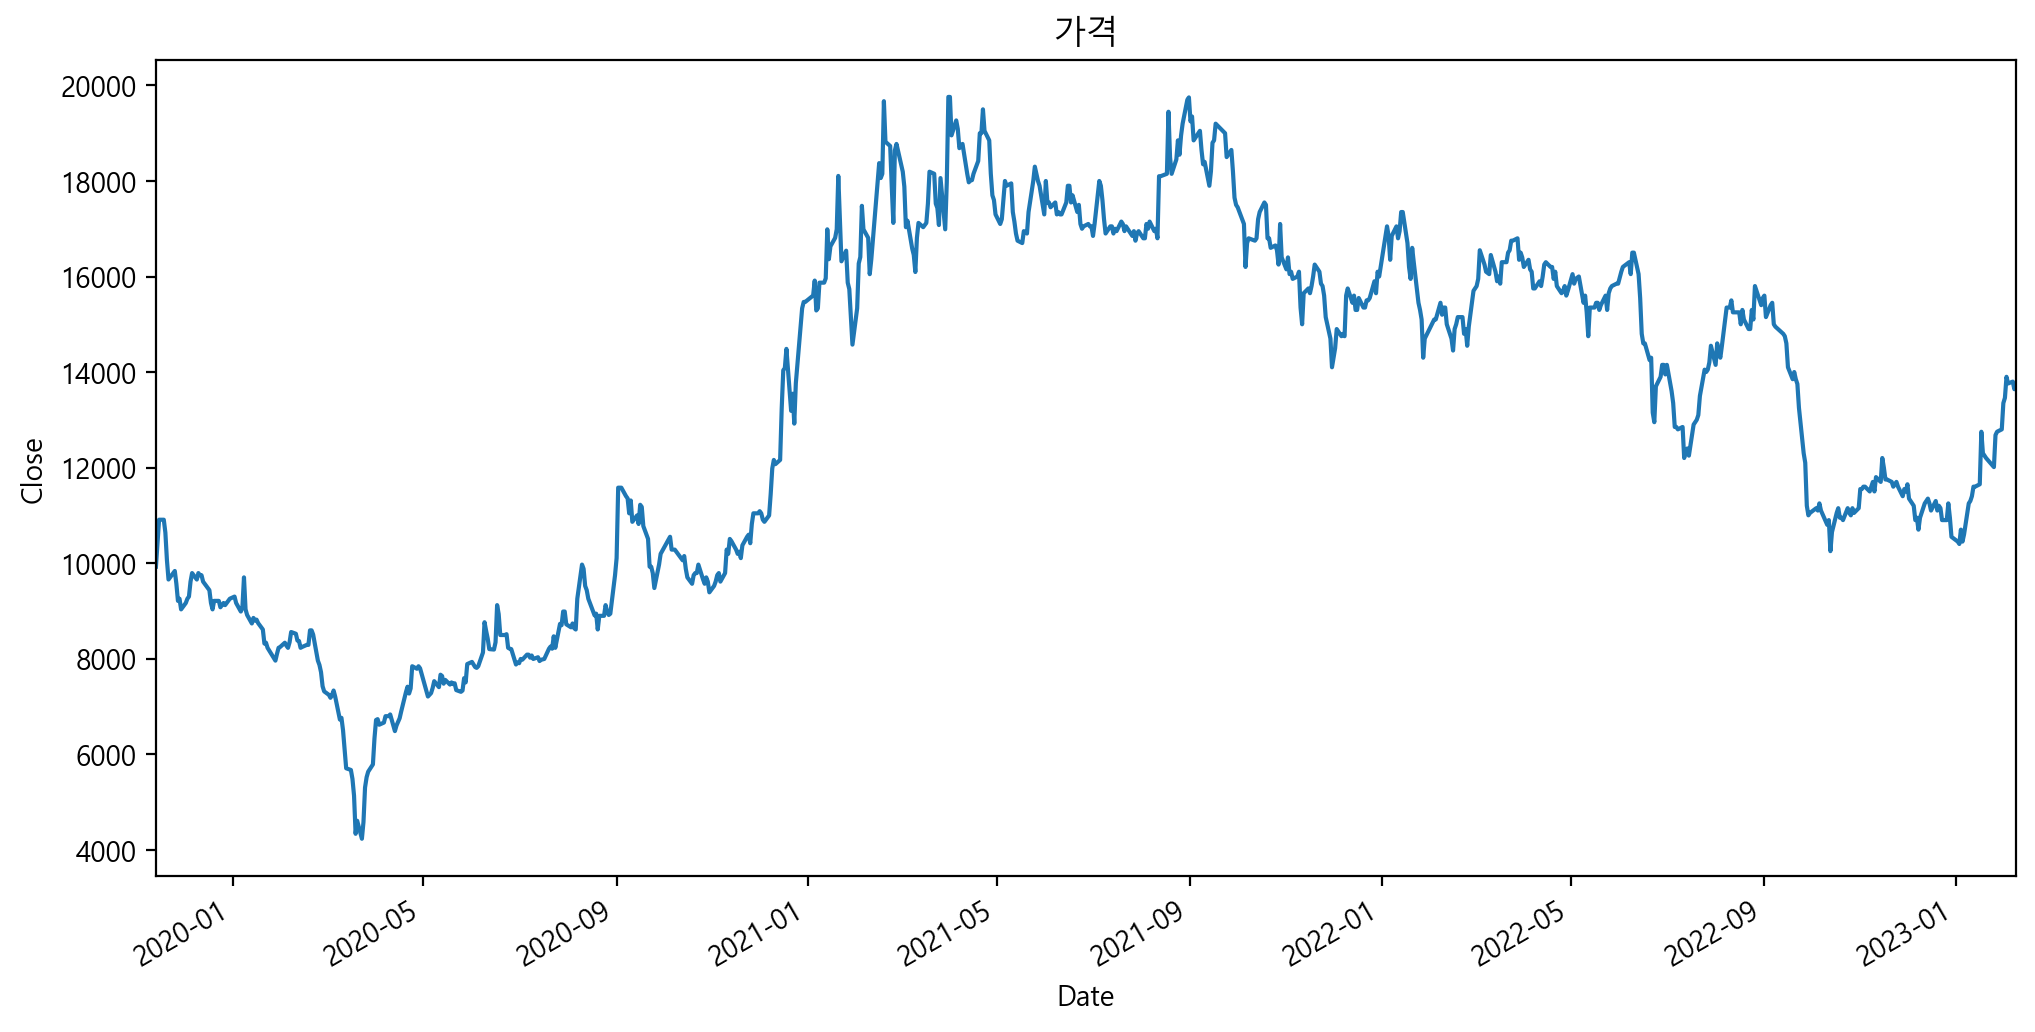

In [20]:
# set axis labels
# figure > 도화지, axis > x축, y축 그리는거
# 주피터나 코랩에서는 figure는 자동으로 이미 그려져 O

ax = df['Close'].plot(figsize=(12,6), title='가격')
ax.autoscale(axis='x', tight=True)
ax.set(xlabel='Date', ylabel='Close')

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Close')]

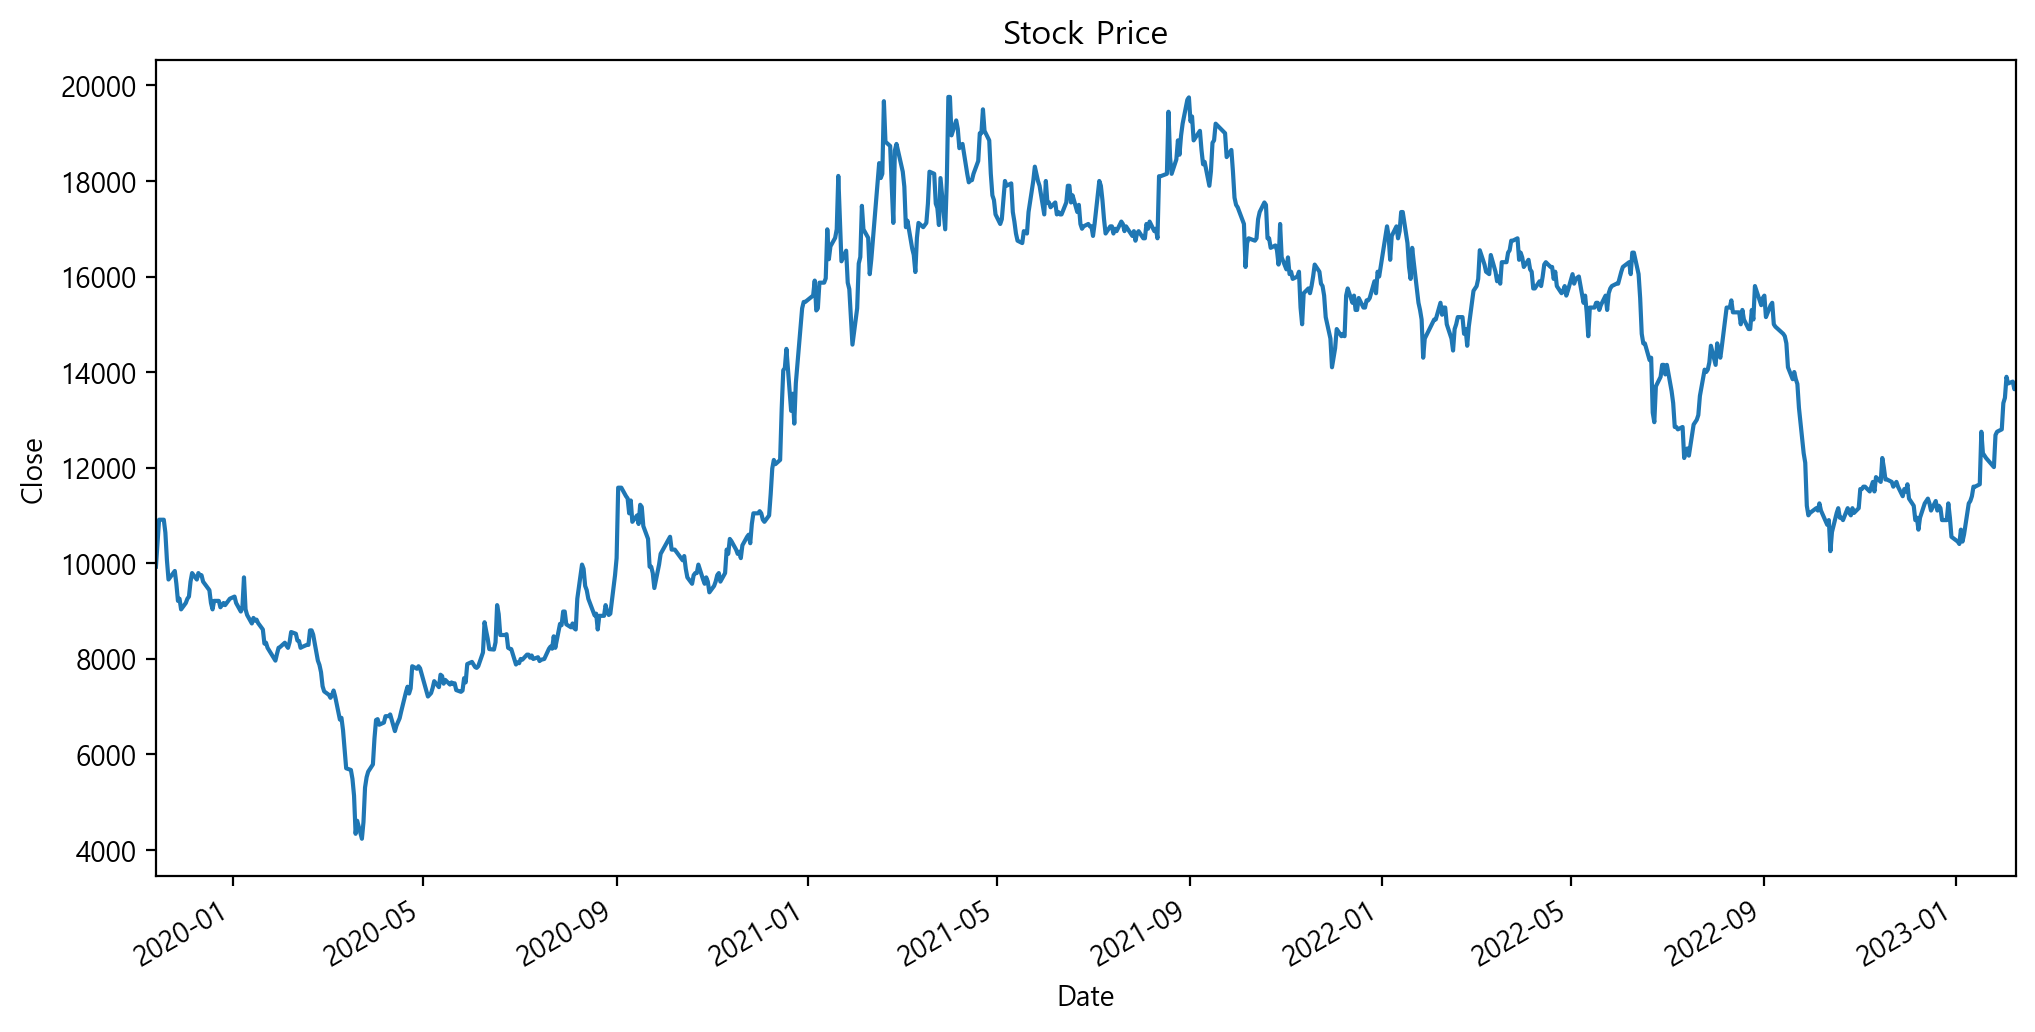

In [9]:
# set axis labels
# figure > 도화지, axis > x축, y축 그리는거
# 주피터나 코랩에서는 figure는 자동으로 이미 그려져 O

ax = df['Close'].plot(figsize=(12,6), title='Stock Price')
ax.autoscale(axis='x', tight=True)
ax.set(xlabel='Date', ylabel='Close')

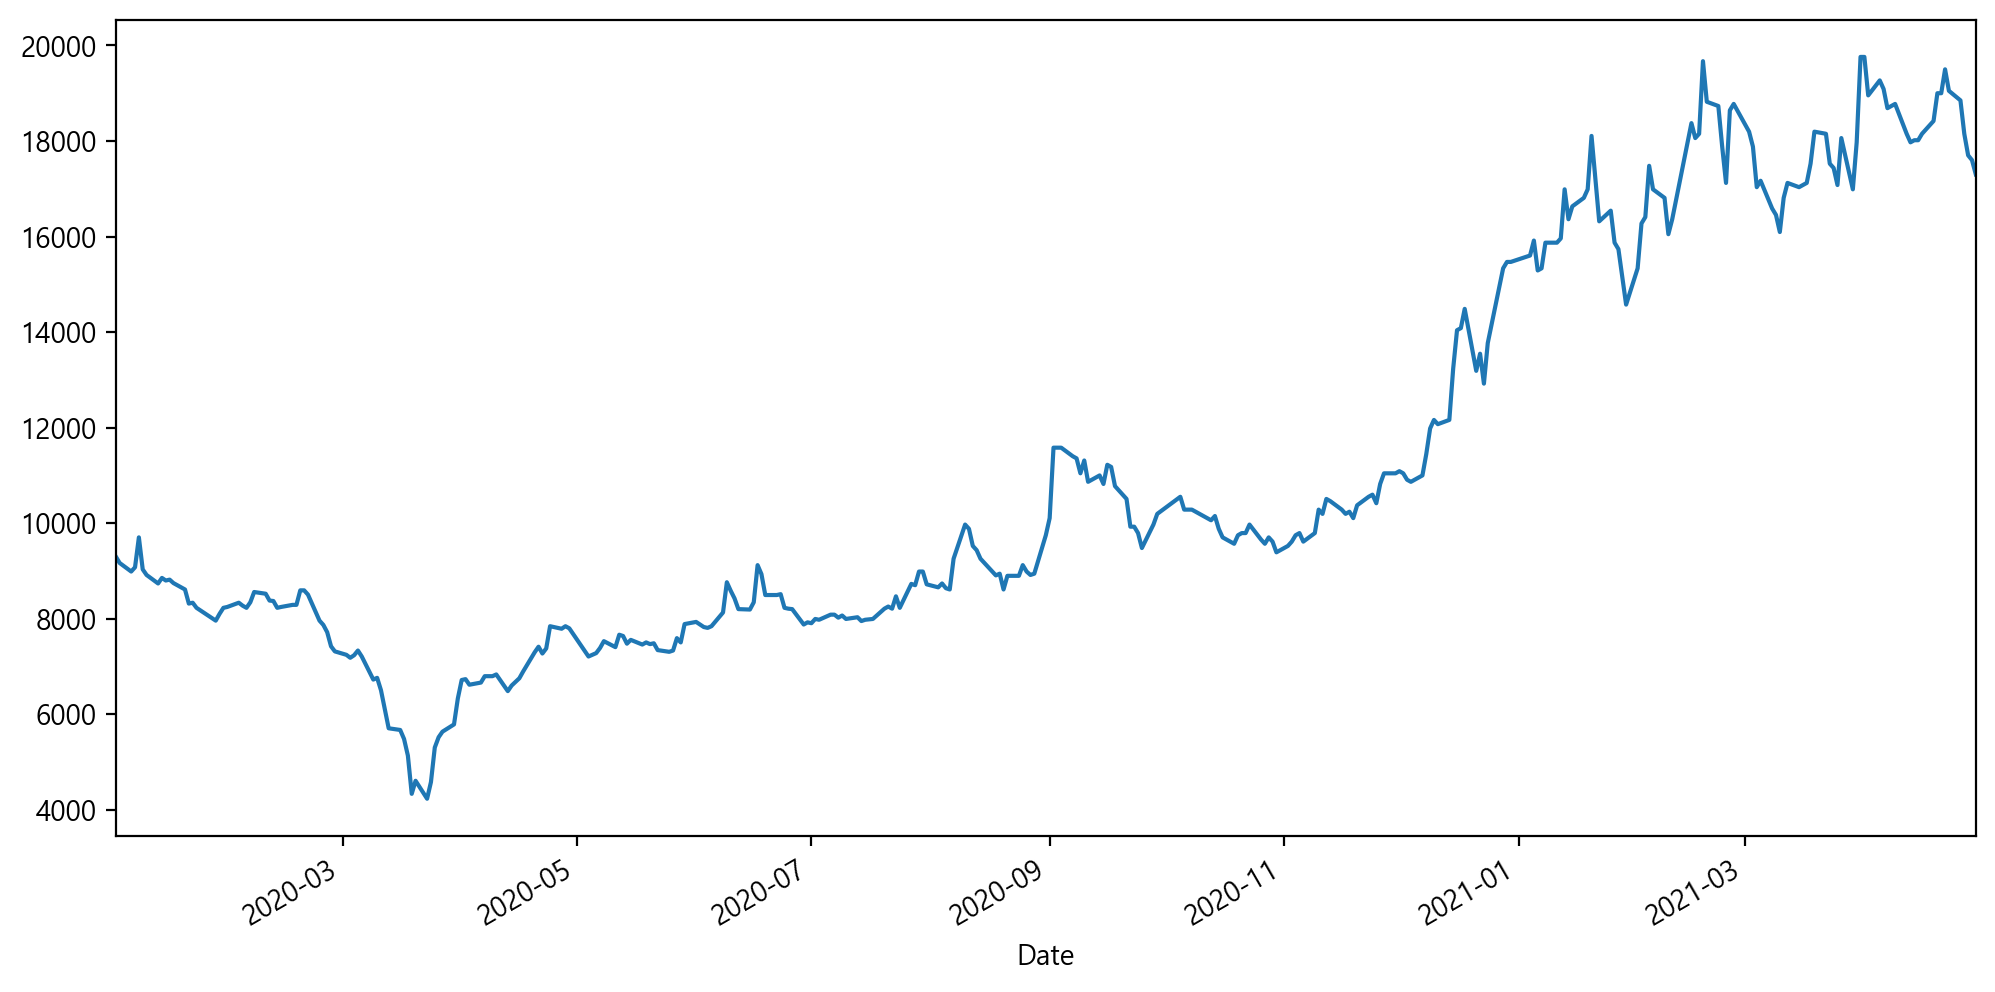

In [11]:
# X Limit
df['Close']['2020-01-01':'2021-05-01'].plot(figsize=(12,6)).autoscale(axis='x', tight=True) # 그래프를 자른 다음에 그림 // 시리즈에서 원하는 만큼 가져와서 그림

<AxesSubplot: xlabel='Date'>

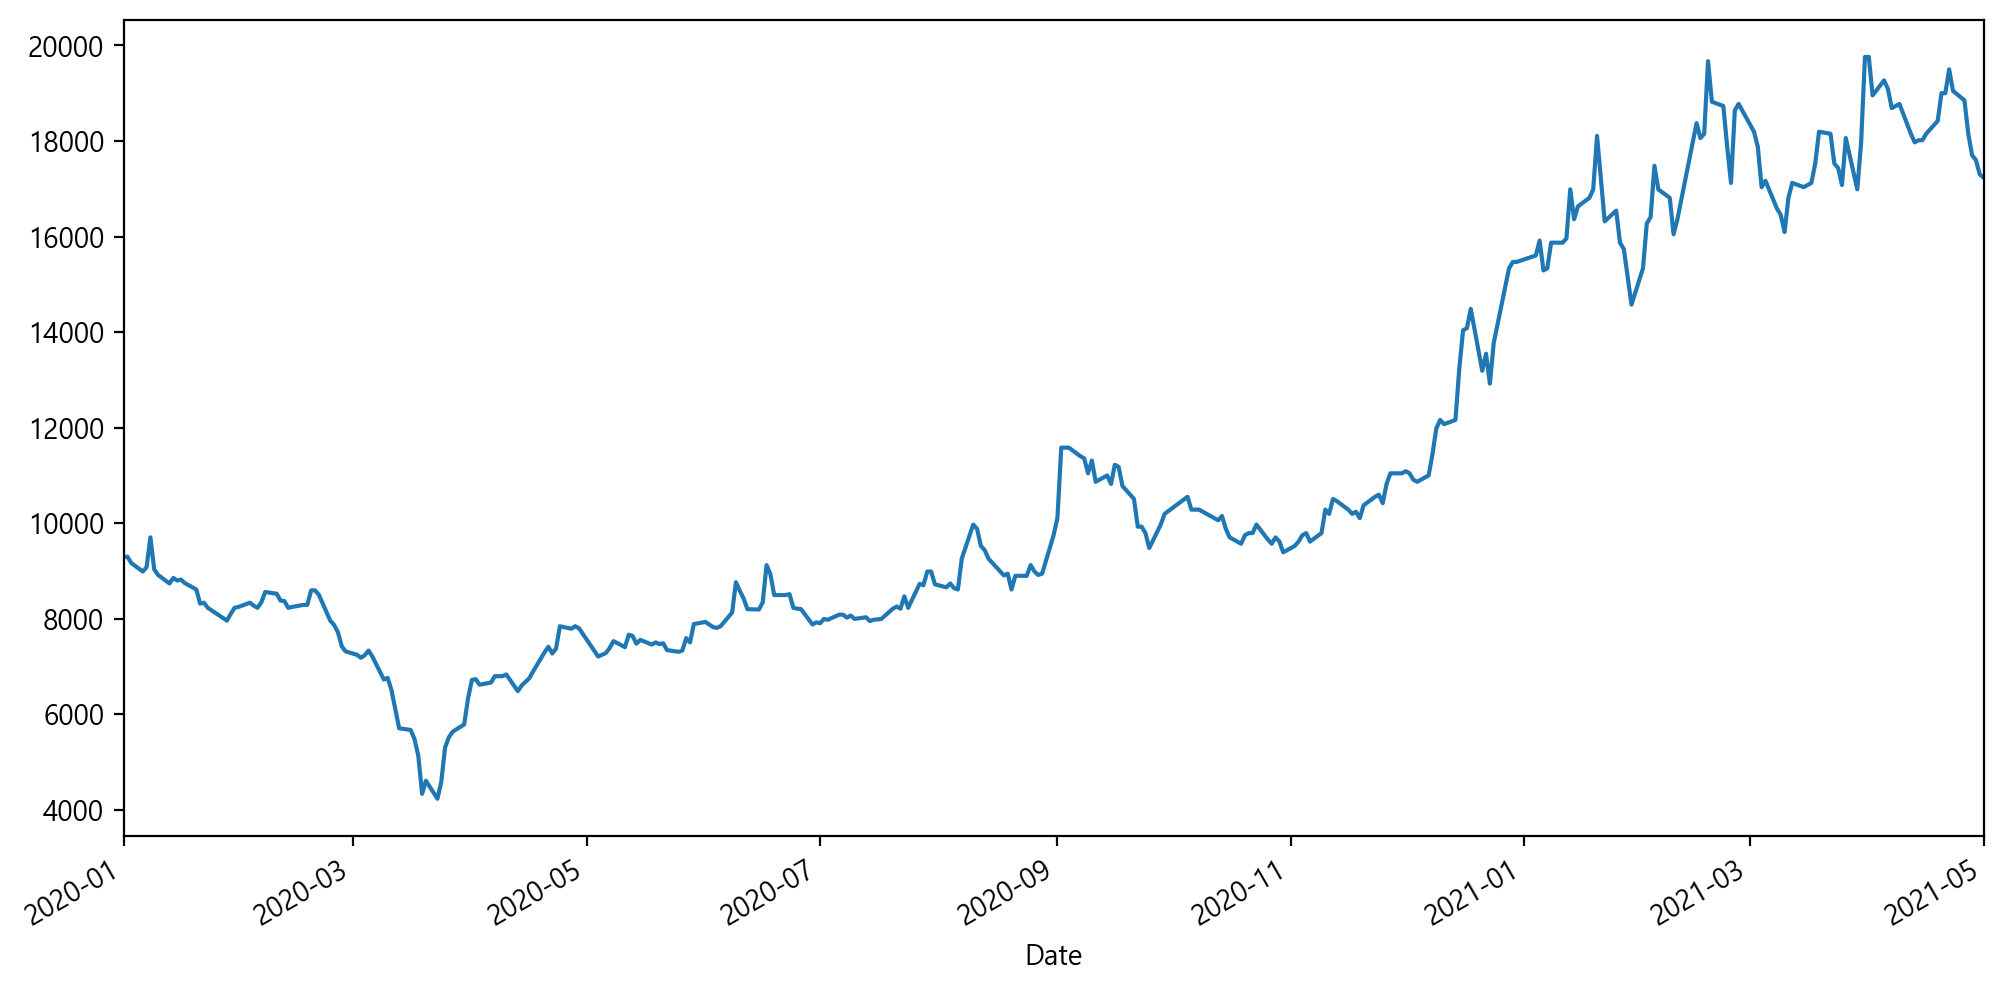

In [12]:
df['Close'].plot(figsize=(12,6), xlim = ['2020-01-01','2021-05-01']) # 그래프를 그린 다음에 자름

In [13]:
df.loc['2020-01-01':'2021-05-01', 'Close'].min() # 가장 낮았던 가격 / loc는 인덱스나 컬럼, iloc는 행번호!

4229

In [14]:
df.loc['2020-01-01':'2021-05-01', 'Close'].max() # 가장 높았던 가격

19760

<AxesSubplot: xlabel='Date'>

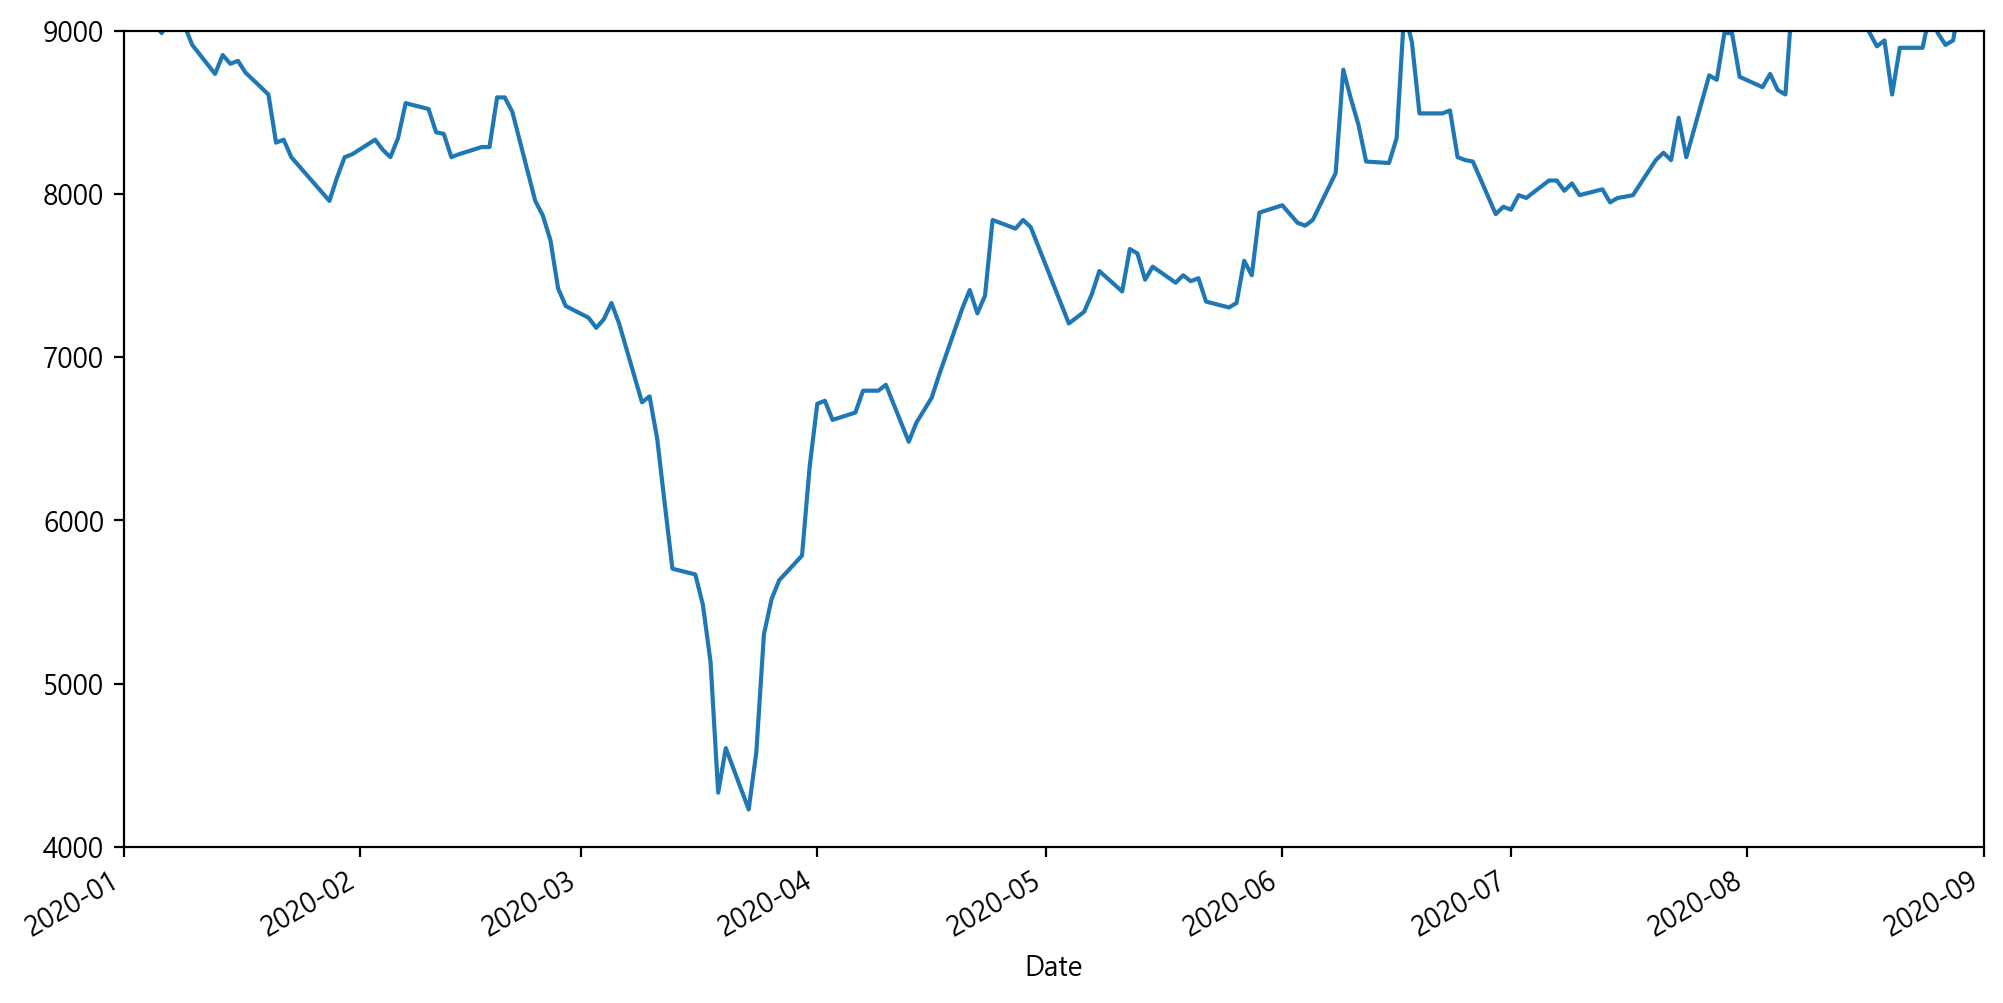

In [17]:
df['Close'].plot(figsize=(12,6), xlim = ['2020-01-01','2020-09-01'], ylim = [4000, 9000])

<AxesSubplot: xlabel='Date'>

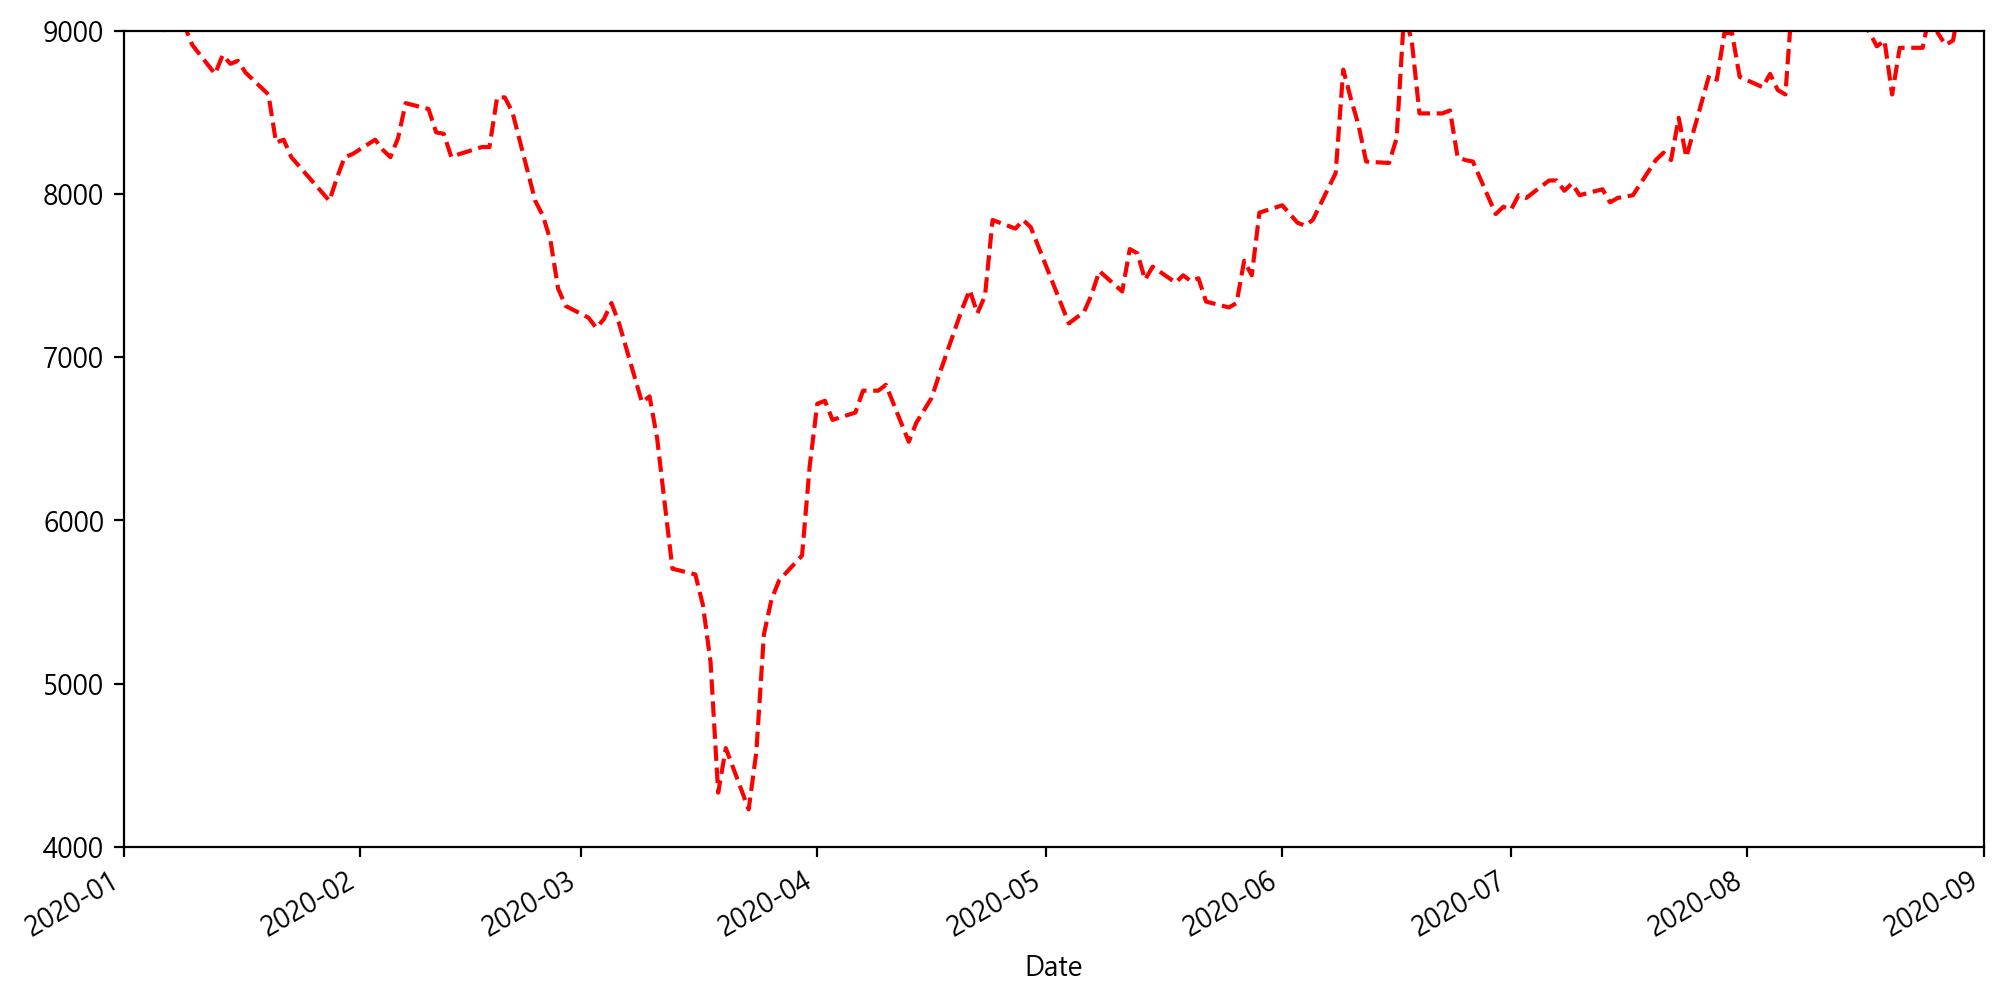

In [18]:
df['Close'].plot(figsize=(12,6), xlim = ['2020-01-01','2020-09-01'], ylim = [4000, 9000], ls='--', c='r') # linestyle, color

## X Ticks
- tick에는 major, minor 2가지 있음

In [21]:
from matplotlib import dates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

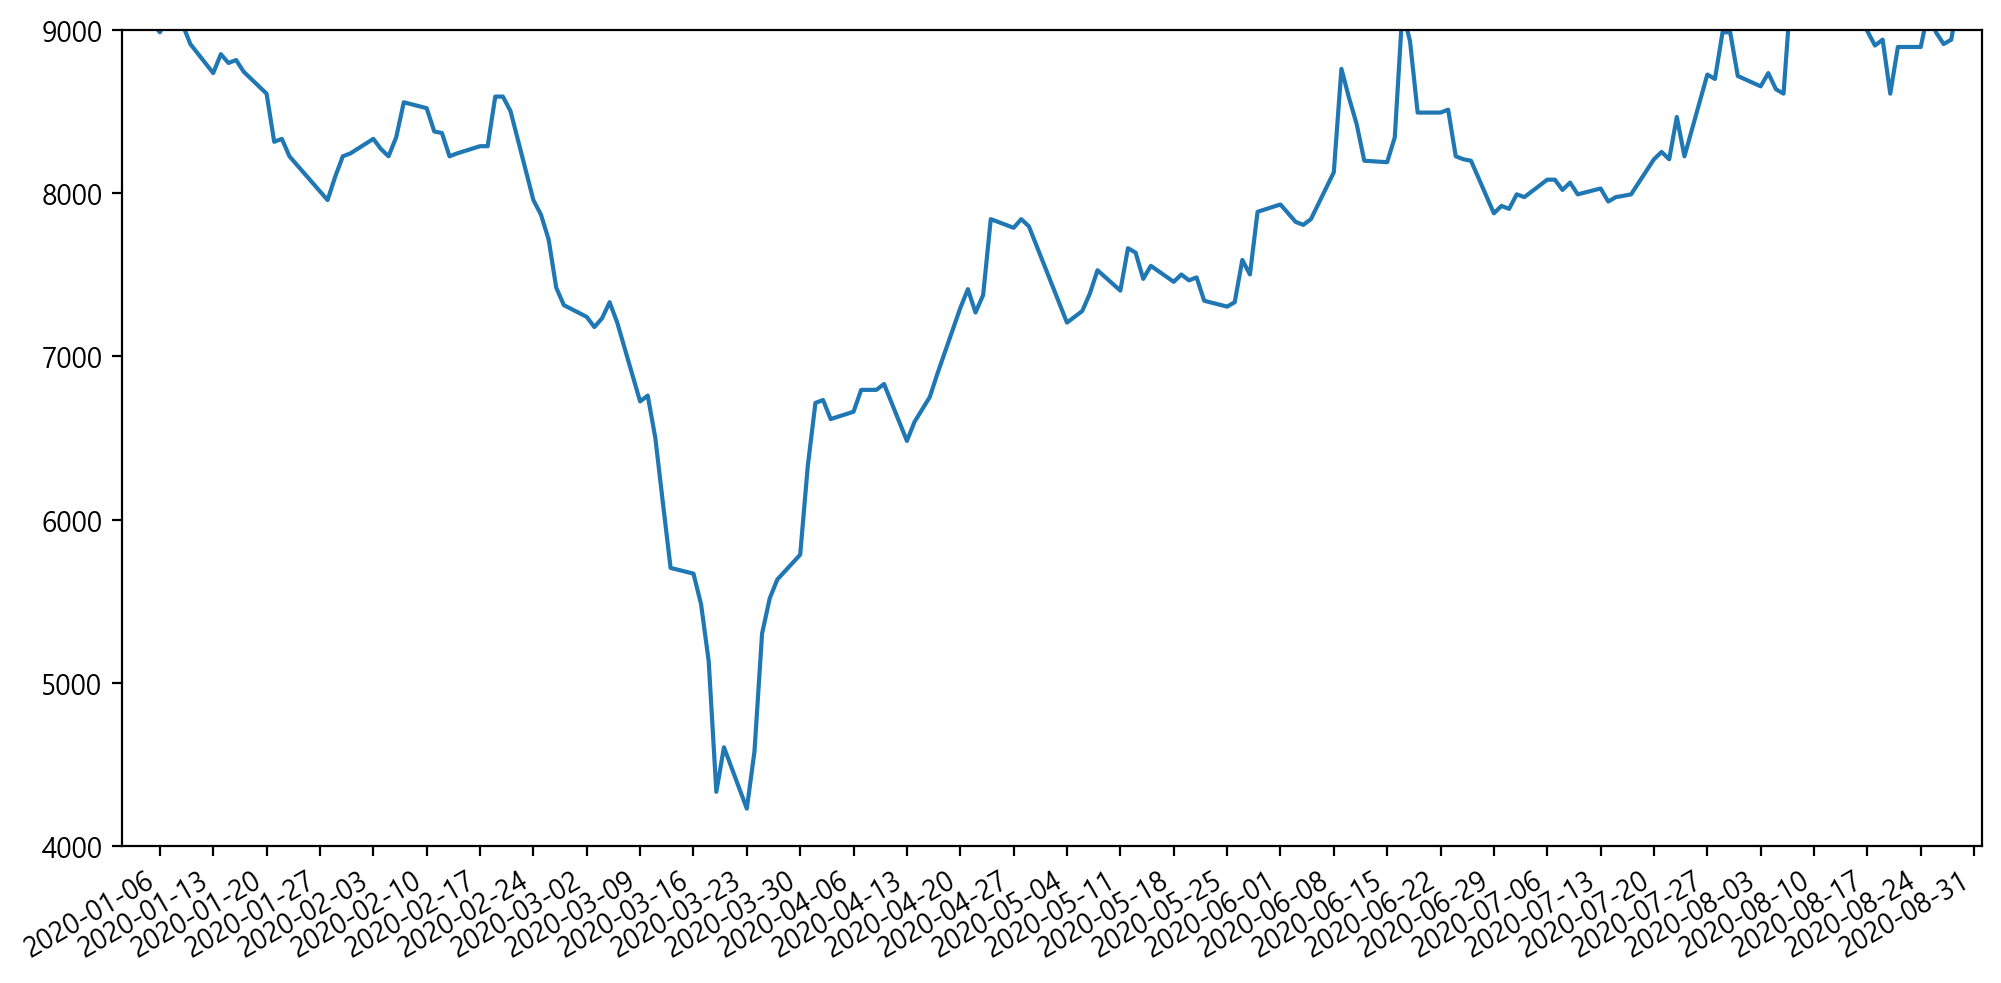

In [22]:
ax = df['Close'].plot(figsize=(12,6), xlim = ['2020-01-01','2020-09-01'], ylim = [4000, 9000])
ax.set(xlabel = '')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 0)) # 월요일만 표시하고 싶을때

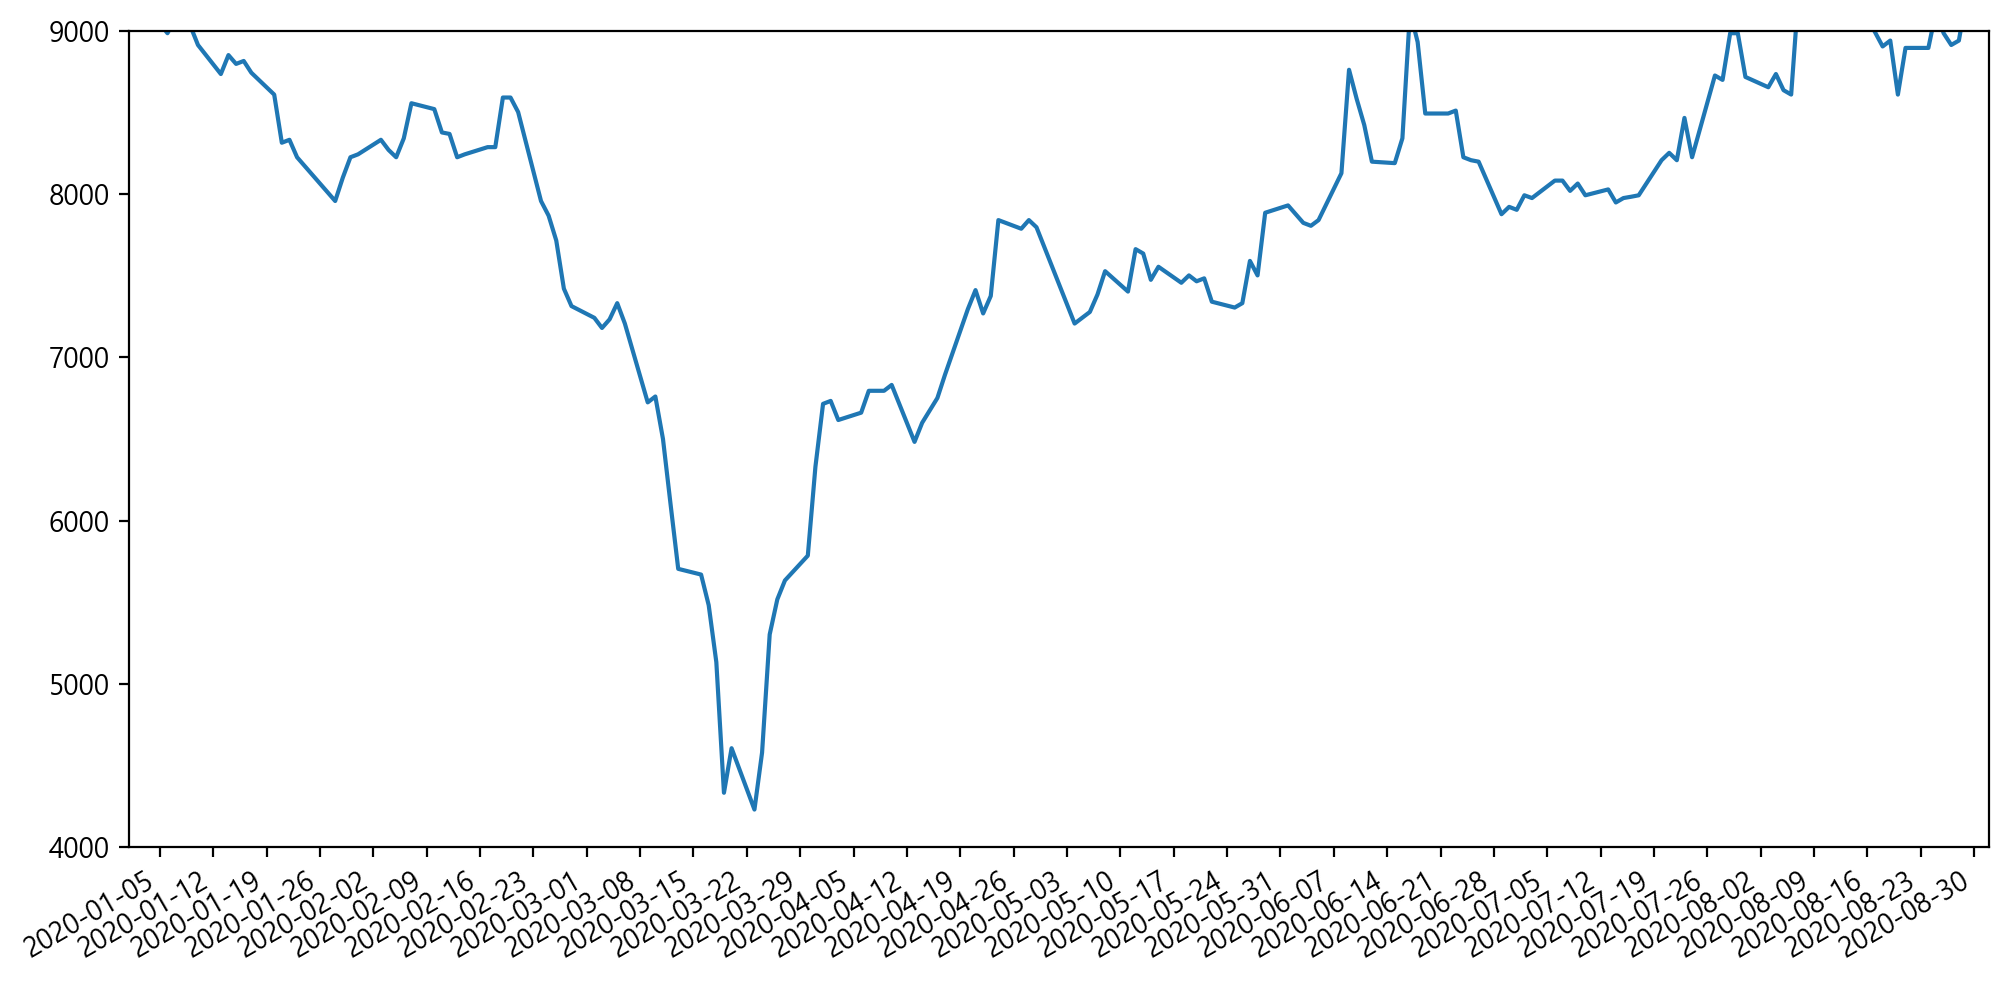

In [23]:
ax = df['Close'].plot(figsize=(12,6), xlim = ['2020-01-01','2020-09-01'], ylim = [4000, 9000])
ax.set(xlabel = '')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = SU)) # MO, TU, WE, TH, FR, SA, SU

In [24]:
from datetime import datetime 
datetime(2023,2,8,16,13,30)

datetime.datetime(2023, 2, 8, 16, 13, 30)

In [25]:
datetime(2023,2,8,16,13,30).strftime('%A') # strftime > # 우리가 원하는 데이터 format으로 가져올 수 있음(내가 원하는 형식대로!)

'Wednesday'

In [28]:
datetime(2023,2,8,16,13,30).strftime('%A, %B %d, %Y %I:%M:%S %p')

'Wednesday, February 08, 2023 04:13:30 PM'

In [37]:
datetime(2023,2,8,16,13,30).strftime('%A/%B/%d, %Y %I:%M:%S %p')

'Wednesday/February/08, 2023 04:13:30 PM'

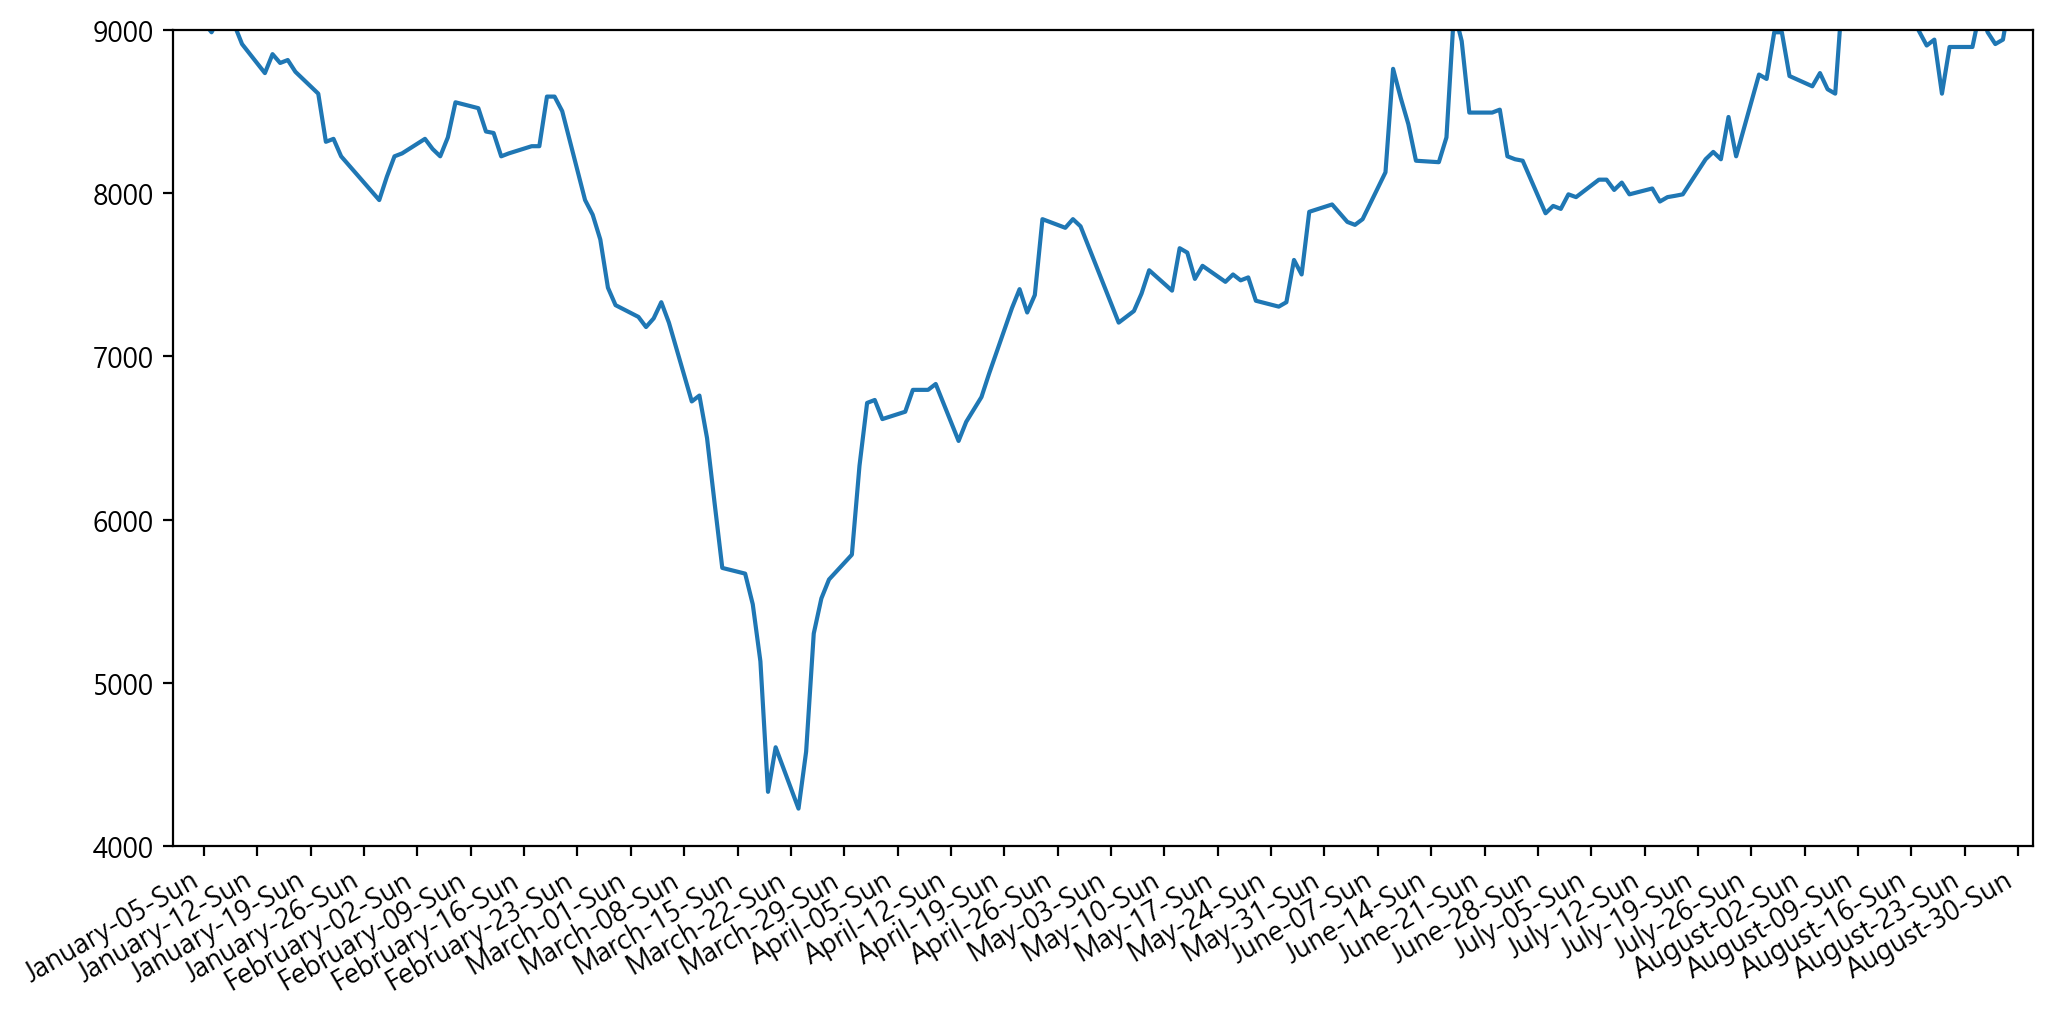

In [30]:
ax = df['Close'].plot(figsize=(12,6), xlim = ['2020-01-01','2020-09-01'], ylim = [4000, 9000])
ax.set(xlabel = '')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = SU)) # MO, TU, WE, TH, FR, SA, SU
ax.xaxis.set_major_formatter(dates.DateFormatter('%B-%d-%a')) # 우리가 원하는 format으로 tick을 바꿔줄 수 있음

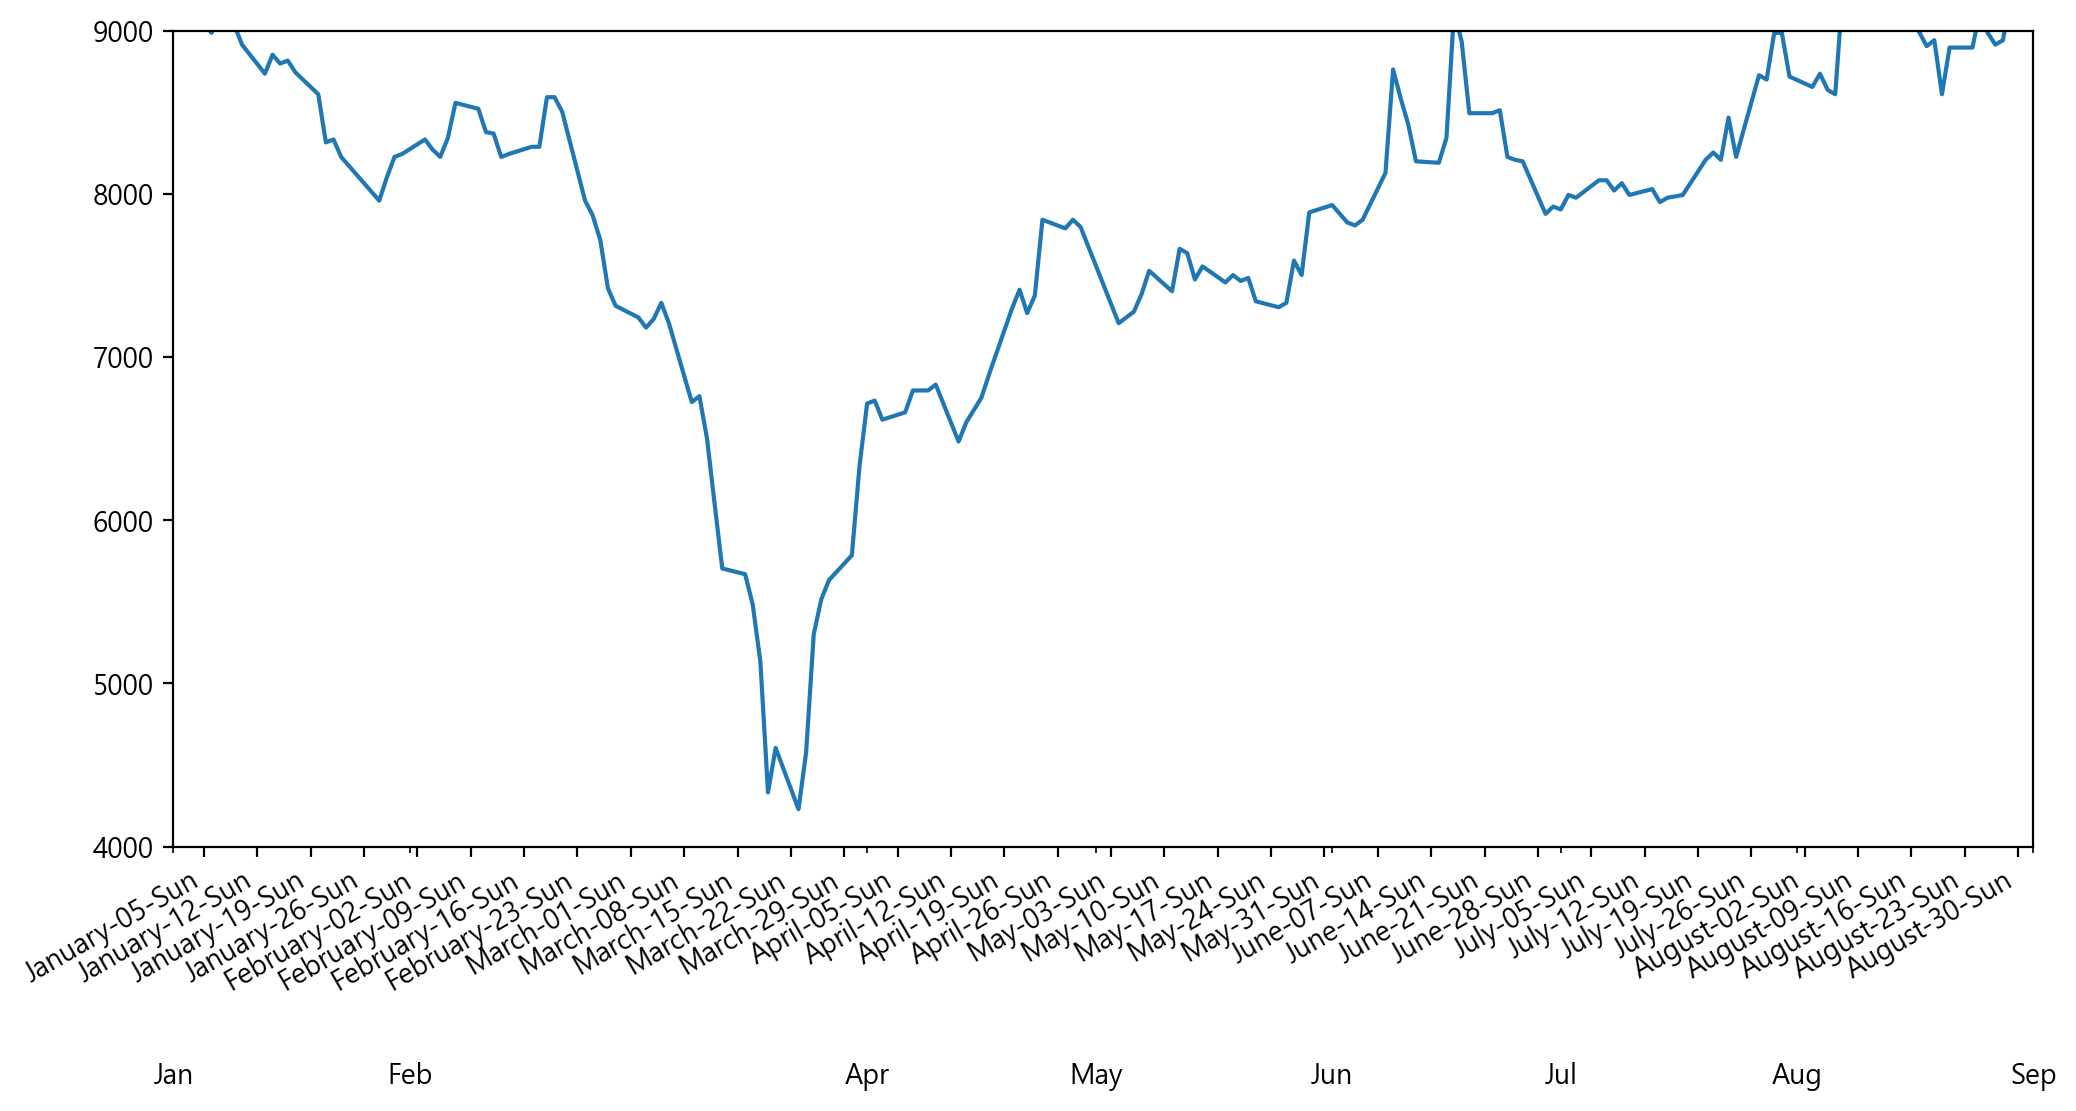

In [36]:
ax = df['Close'].plot(figsize=(12,6), xlim = ['2020-01-01','2020-09-01'], ylim = [4000, 9000])
ax.set(xlabel = '')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = SU)) # MO, TU, WE, TH, FR, SA, SU
ax.xaxis.set_major_formatter(dates.DateFormatter('%B-%d-%a'))

ax.xaxis.set_minor_locator(dates.MonthLocator()) # 월표시(조그마한 틱이 생김)
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n\n\n\n\n%b'))